In [ ]:
import colorcet as cc

def bar_plot(ax, data, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]], total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())
    if legend==False:
        return bars

/tmp/ipykernel_109469/1441670229.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_109469/1441670229.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))


   set_id  method  I_value  r_value
0     3.0    :ac:     37.4    0.178
1     3.0  :acsh:     44.6    0.140
2     3.0    :sh:     21.9    0.193
0     3.5    :ac:     42.3    0.163
1     3.5  :acsh:     49.9    0.134
2     3.5    :sh:     31.9    0.159


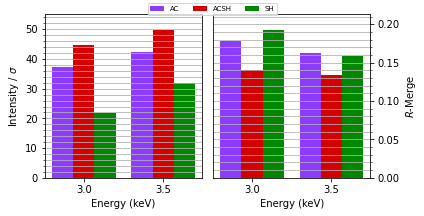

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker

# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/merged_data/csvs/3p0_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/merged_data/csvs/3p5_I_and_r_merge.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
    #df['set_id'] = f"Set {i}"  # Adding a set identifier
    df['set_id'] = df['set_id'].replace(to_replace='_', value=': ')
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)
print(combined_data)

ac = combined_data[combined_data['method']==':ac:']
acsh = combined_data[combined_data['method']==':acsh:']
sh = combined_data[combined_data['method']==':sh:']


n = len(file_paths)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6,3))
data1 = {'AC':ac['I_value'].to_list(), 'ACSH':acsh['I_value'].to_list(), 'SH':sh['I_value'].to_list()}
bars = bar_plot(ax1, data1, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax1.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.set_xticks(list(np.arange(n)))
#ax1.set_xticklabels([list(ac['set_id'])[i].replace(to_replace='_', value=': ') for i in range(n)])
ax1.set_xticklabels([list(ac['set_id'])[i] for i in range(n)])
ax1.set_ylabel("Intensity / $\sigma$")
ax1.set_xlabel("Energy (keV)")
lim = ax1.get_ylim()
ax1.set_ylim(lim[0], lim[1]*1.05)

data2 = {'AC':ac['r_value'].to_list(), 'ACSH':acsh['r_value'].to_list(), 'SH':sh['r_value'].to_list()}
bars2 = bar_plot(ax2, data2, legend=False)
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1,1.15))
ax2.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax2.set_xticks([0,1])
ax2.set_xticklabels([list(ac['set_id'])[i] for i in range(n)])
ax2.set_ylabel("$R$-Merge")
ax2.set_xlabel("Energy (keV)")
lim = ax2.get_ylim()
ax2.set_ylim(lim[0], lim[1]*1.05)
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')
fig.legend(bars, data1.keys(), ncols=3, fontsize='x-small', loc='upper center')
fig.tight_layout()
#plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_2_P1/stats.pdf')
ax1.grid(axis='y', which='both')
ax2.grid(axis='y', which='both')
fig.tight_layout()
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_2_P6122/merged_stats.png', dpi=300)

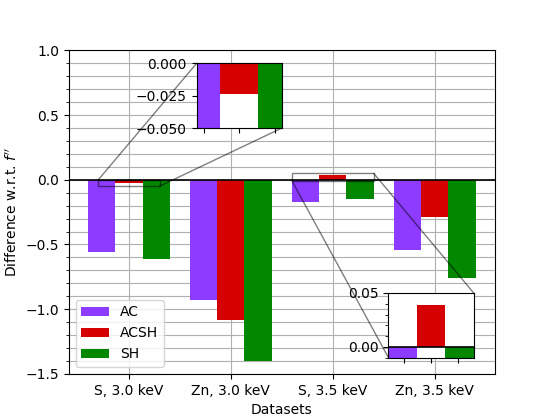

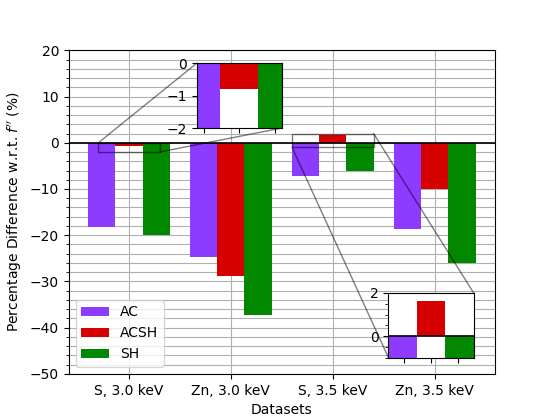

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import colorcet as cc
import matplotlib.ticker as mticker
%matplotlib widget
theoretical = np.array([
    3.05939,
    3.76464,
    2.39044,
    2.91247
])
ac = np.array([
    2.49912,
    2.83766,
    2.21949,
    2.36736
])
sh = np.array([
    2.45008,
    2.36456,
    2.24339,
    2.1546
])
acsh = np.array([
    3.03552,
    2.68316,
    2.42956,
    2.62166])

def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())



fig, ax = plt.subplots(figsize=(5.5,4.2))
x_cat = ["S, 3.0 keV", "Zn, 3.0 keV","S, 3.5 keV","Zn, 3.5 keV"]
bar_plot(ax, {'AC':ac - theoretical,'ACSH':acsh- theoretical,'SH':sh- theoretical}, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(x_cat)
ax.set_ylabel("Difference w.r.t. $f''$")
ax.set_xlabel("Datasets")
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.grid(which='both')
ax.axhline(0, c='black',lw=1.2)
ax.set_ylim(-1.5,1)
leg = ax.get_legend()
leg.set_loc('lower left')
x1, x2, y1, y2 = -0.3, 0.3, -0.05, 0
axins = ax.inset_axes([0.3,0.76,0.2,0.2], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[])
axins.yaxis.set_major_formatter(mticker.ScalarFormatter())
bar_plot(axins, {'AC':ac - theoretical,'ACSH':acsh- theoretical,'SH':sh- theoretical}, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
ax.indicate_inset_zoom(axins, edgecolor="black")
axins.get_legend().set_visible(False)
x1, x2, y1, y2 = 1.6, 2.4, -0.01, 0.05
axins = ax.inset_axes([0.75,0.05,0.2,0.2], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[])
axins.yaxis.set_major_formatter(mticker.ScalarFormatter())
axins.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.set_axisbelow(True)

axins.axhline(0, c='black',lw=1.2)
bar_plot(axins, {'AC':ac - theoretical,'ACSH':acsh- theoretical,'SH':sh- theoretical}, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
ax.indicate_inset_zoom(axins, edgecolor="black")
axins.get_legend().set_visible(False)
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_2_P6122/FDP_diff.pdf')


# PERCENTAGE DIFFERENCE

fig, ax = plt.subplots(figsize=(5.5,4.2))
x_cat = ["S, 3.0 keV", "Zn, 3.0 keV","S, 3.5 keV","Zn, 3.5 keV"]
bar_plot(ax, {'AC':100*(ac - theoretical)/theoretical,'ACSH':100*(acsh- theoretical)/theoretical,'SH':100*(sh- theoretical)/theoretical}, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(x_cat)
ax.set_ylabel("Percentage Difference w.r.t. $f''$ (%)")
ax.set_xlabel("Datasets")
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.grid(which='both')
ax.axhline(0, c='black',lw=1.2)
ax.set_ylim(-0.5*100,0.2*100)
leg = ax.get_legend()
leg.set_loc('lower left')
x1, x2, y1, y2 = -0.3, 0.3, -0.02*100, 0
axins = ax.inset_axes([0.3,0.76,0.2,0.2], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[])
axins.yaxis.set_major_formatter(mticker.ScalarFormatter())
bar_plot(axins, {'AC':100*(ac - theoretical)/theoretical,'ACSH':100*(acsh- theoretical)/theoretical,'SH':100*(sh- theoretical)/theoretical}, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
ax.indicate_inset_zoom(axins, edgecolor="black")
axins.get_legend().set_visible(False)
x1, x2, y1, y2 = 1.6, 2.4, -0.01*100, 0.02*100
axins = ax.inset_axes([0.75,0.05,0.2,0.2], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[])
axins.yaxis.set_major_formatter(mticker.ScalarFormatter())
axins.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.set_axisbelow(True)

axins.axhline(0, c='black',lw=1.2)
bar_plot(axins, {'AC':100*(ac - theoretical)/theoretical,'ACSH':100*(acsh- theoretical)/theoretical,'SH':100*(sh- theoretical)/theoretical}, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
ax.indicate_inset_zoom(axins, edgecolor="black")
axins.get_legend().set_visible(False)
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_2_P6122/FDP_percent_diff.pdf')
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_2_P6122/FDP_percent_diff.png', dpi=300)

/tmp/ipykernel_109469/3840736720.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_109469/3840736720.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))


   set_id  method  I_value  r_value
0     3.0    :ac:     37.4    0.178
1     3.0  :acsh:     44.6    0.140
2     3.0    :sh:     21.9    0.193
0     3.5    :ac:     42.3    0.163
1     3.5  :acsh:     49.9    0.134
2     3.5    :sh:     31.9    0.159


/tmp/ipykernel_109469/3840736720.py:60: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


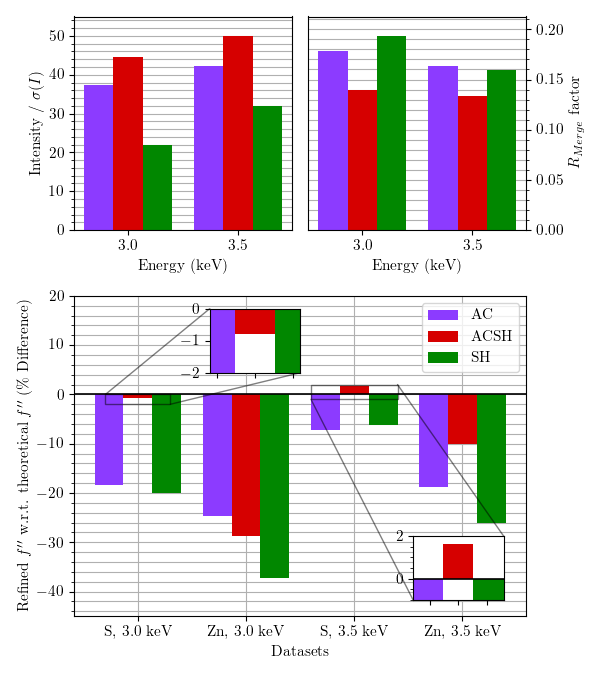

In [10]:
fig = plt.figure(figsize=(6, 6.75),layout='constrained')
plt.rcParams['font.size']=11
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='serif'
axd = fig.subplot_mosaic(
    """
    AB
    CC
    """, height_ratios=(1, 1.5))
file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/merged_data/csvs/3p0_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/merged_data/csvs/3p5_I_and_r_merge.csv'
]
# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
    #df['set_id'] = f"Set {i}"  # Adding a set identifier
    df['set_id'] = df['set_id'].replace(to_replace='_', value=': ')
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)
print(combined_data)

ac = combined_data[combined_data['method']==':ac:']
acsh = combined_data[combined_data['method']==':acsh:']
sh = combined_data[combined_data['method']==':sh:']


n = len(file_paths)
ax1, ax2 = (axd['A'], axd['B'])
data1 = {'AC':ac['I_value'].to_list(), 'ACSH':acsh['I_value'].to_list(), 'SH':sh['I_value'].to_list()}
bars = bar_plot(ax1, data1, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax1.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.set_xticks(list(np.arange(n)))
#ax1.set_xticklabels([list(ac['set_id'])[i].replace(to_replace='_', value=': ') for i in range(n)])
ax1.set_xticklabels([list(ac['set_id'])[i] for i in range(n)])
ax1.set_ylabel("Intensity / $\sigma(I)$")
ax1.set_xlabel("Energy (keV)")
lim = ax1.get_ylim()
ax1.set_ylim(lim[0], lim[1]*1.05)

data2 = {'AC':ac['r_value'].to_list(), 'ACSH':acsh['r_value'].to_list(), 'SH':sh['r_value'].to_list()}
bars2 = bar_plot(ax2, data2, legend=False,  colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1,1.15))
ax2.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax2.set_xticks([0,1])
ax2.set_xticklabels([list(ac['set_id'])[i] for i in range(n)])
ax2.set_ylabel("$R_{Merge}$ factor")
ax2.set_xlabel("Energy (keV)")
lim = ax2.get_ylim()
ax2.set_ylim(lim[0], lim[1]*1.05)
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')
#fig.legend(bars, data1.keys(), ncols=3, fontsize='x-small', loc='upper center')
fig.tight_layout()
#plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_2_P1/stats.pdf')
ax1.grid(axis='y', which='both')
ax2.grid(axis='y', which='both')
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)

theoretical = np.array([
    3.05939,
    3.76464,
    2.39044,
    2.91247
])
ac = np.array([
    2.49912,
    2.83766,
    2.21949,
    2.36736
])
sh = np.array([
    2.45008,
    2.36456,
    2.24339,
    2.1546
])
acsh = np.array([
    3.03552,
    2.68316,
    2.42956,
    2.62166])

ax = axd['C']
x_cat = ["S, 3.0 keV", "Zn, 3.0 keV","S, 3.5 keV","Zn, 3.5 keV"]
bar_plot(ax, {'AC':100*(ac - theoretical)/theoretical,'ACSH':100*(acsh- theoretical)/theoretical,'SH':100*(sh- theoretical)/theoretical}, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(x_cat)
ax.set_ylabel("Refined $f''$ w.r.t. theoretical $f''$ (\% Difference)")
ax.set_xlabel("Datasets")
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.grid(which='both')
ax.axhline(0, c='black',lw=1.2)
ax.set_ylim(-0.45*100,0.2*100)
leg = ax.get_legend()
leg.set_loc('upper right')
x1, x2, y1, y2 = -0.3, 0.3, -0.02*100, 0
axins = ax.inset_axes([0.3,0.76,0.2,0.2], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[])
axins.yaxis.set_major_formatter(mticker.ScalarFormatter())
bar_plot(axins, {'AC':100*(ac - theoretical)/theoretical,'ACSH':100*(acsh- theoretical)/theoretical,'SH':100*(sh- theoretical)/theoretical}, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
ax.indicate_inset_zoom(axins, edgecolor="black")
axins.get_legend().set_visible(False)
x1, x2, y1, y2 = 1.6, 2.4, -0.01*100, 0.02*100
axins = ax.inset_axes([0.75,0.05,0.2,0.2], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[])
axins.yaxis.set_major_formatter(mticker.ScalarFormatter())
axins.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.set_axisbelow(True)

axins.axhline(0, c='black',lw=1.2)
bar_plot(axins, {'AC':100*(ac - theoretical)/theoretical,'ACSH':100*(acsh- theoretical)/theoretical,'SH':100*(sh- theoretical)/theoretical}, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
ax.indicate_inset_zoom(axins, edgecolor="black")
axins.get_legend().set_visible(False)

fig.tight_layout()
plt.savefig('/home/icf19162/CP5-Thesis/poster_merged_mosaic.pdf')